In [1]:
import pandas as pd
import numpy as np
import datetime
import os
import os.path
import sklearn
! pip install pmdarima
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest
import matplotlib.pylab as plt

In [17]:
dfmedellin = pd.read_csv(os.path.join('../Output', 'data_medellin.csv'))
dfmedellin_activos = dfmedellin[['FECHA','ACTIVOS']]
dfmedellin_nuevoscasos = dfmedellin[['FECHA','CASOS']]
dfm2 = pd.to_datetime(dfmedellin_nuevoscasos['FECHA'])
dfmedellin_nuevoscasos.index = dfm2
data_med = dfmedellin_nuevoscasos.drop(['FECHA'], axis=1)
#data_med

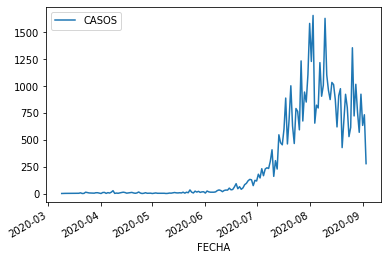

In [18]:
# Ver comportamiento de nuevos casos
# A partir de julio los datos crecen exponencialmente......
data_med.plot()

In [19]:
# prueba de estacionaridad (Dickey Fuller Aumentada)

adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(data_med)

(0.6286282162941894, True)

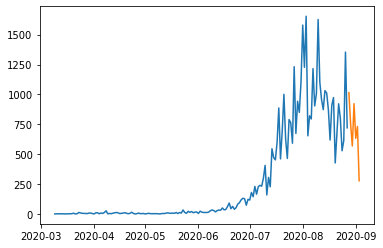

In [20]:
# data_train y data_test
train = data_med[:int(len(data_med)*(1-7/len(data_med)))]
test = data_med[-7:]
plt.plot(train)
plt.plot(test)

In [6]:
# Construcción ARIMA

In [21]:
modelo_arima = auto_arima(train, start_p=0, d=1, start_q=0, 
                          max_p=10, max_d=10, max_q=10,
                          start_P=0, D=1, start_Q=0, 
                          max_P=10, max_D=10, max_Q=10, m=7, seasonal=True,
                          error_action='warn', trace=True,
                          supress_warnings=True, stepwise=True, random_state=20, n_fit=50)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=2089.528, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=2059.074, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=2017.362, Time=0.33 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=2043.864, Time=0.06 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=inf, Time=0.52 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=inf, Time=0.59 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=2031.558, Time=0.18 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=inf, Time=0.75 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=2072.404, Time=0.15 sec
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=2019.345, Time=0.43 sec
 ARIMA(0,1,2)(0,1,1)[7]             : AIC=2019.338, Time=0.45 sec
 ARIMA(1,1,0)(0,1,1)[7]             : AIC=2043.588, Time=0.27 sec
 ARIMA(1,1,2)(0,1,1)[7]             : AIC=2017.717, Time=1.40 sec
 ARIMA(0,1,1)(0,1,1)[7] intercept   : AIC=2019.173, Time=0.53 sec

Best model:  ARIMA(0,1,1)(0,1,1)[7]          
T

In [22]:
modelo_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  162
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 7)   Log Likelihood               -1005.681
Date:                           Thu, 03 Sep 2020   AIC                           2017.362
Time:                                   23:31:10   BIC                           2026.472
Sample:                                        0   HQIC                          2021.062
                                           - 162                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6846      0.032    -21.698      0.000      -0.746      -0.623
ma.S.L7       -0.8203      0.027    -30.593      0.000      -0.873      -0.768
sigma2       2.61e+04   1488.636     17.535      0.000    2.32e+04     2.9e+04
===================================================================================
Ljung-Box (Q):                       64.41   Jarque-Bera (JB):               362.90
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):            2969.23   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
#test predicción con Auto Arima
test_prediccion_nuevoscasos = pd.DataFrame(modelo_arima.predict(n_periods = len(test)), index = test.index)
test_prediccion_nuevoscasos.columns = ['Predicción nuevos casos']
test_prediccion_nuevoscasos


,Predicción nuevos casos
FECHA,
2020-08-28,923.659146
2020-08-29,980.351293
2020-08-30,878.294852
2020-08-31,973.233474
2020-09-01,864.542585
2020-09-02,998.908506
2020-09-03,778.562509


C:\Users\yaflo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Unrecognized location 'left corner'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  """


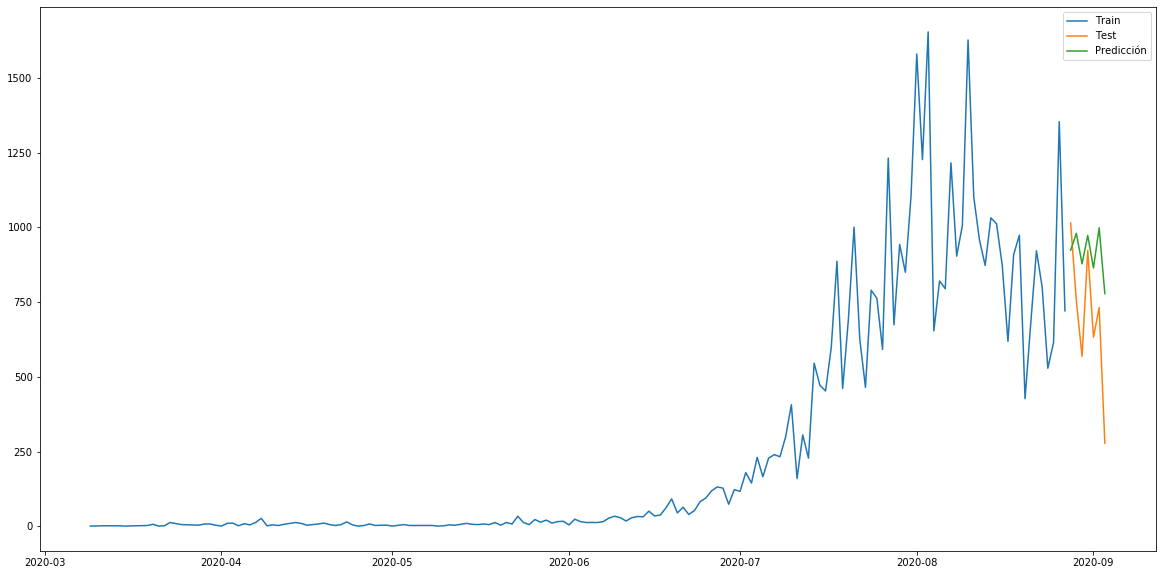

In [24]:
plt.figure(figsize=(20,10))
plt.plot(train,label='Train')
plt.plot(test, label='Test')
plt.plot(test_prediccion_nuevoscasos, label='Predicción')
plt.legend(loc='left corner')
plt.show()


In [25]:
from sklearn.metrics import r2_score
test['Test Predicción nuevos casos'] = test_prediccion_nuevoscasos
r2_score(test['CASOS'], test['Test Predicción nuevos casos'])

C:\Users\yaflo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


-0.5102850084066719

In [33]:
#predicción con Auto Arima casos
prediccion_nuevoscasos = pd.DataFrame(modelo_arima.predict(n_periods = len(data_med)), index = data_med.index)
prediccion_nuevoscasos.columns = ['Predicción nuevos casos']
prediccion_nuevoscasos


,Predicción nuevos casos
FECHA,
2020-03-09,923.659146
2020-03-11,980.351293
2020-03-14,878.294852
2020-03-15,973.233474
2020-03-19,864.542585
...,...
2020-08-30,2011.795399
2020-08-31,1903.104511
2020-09-01,2037.470431


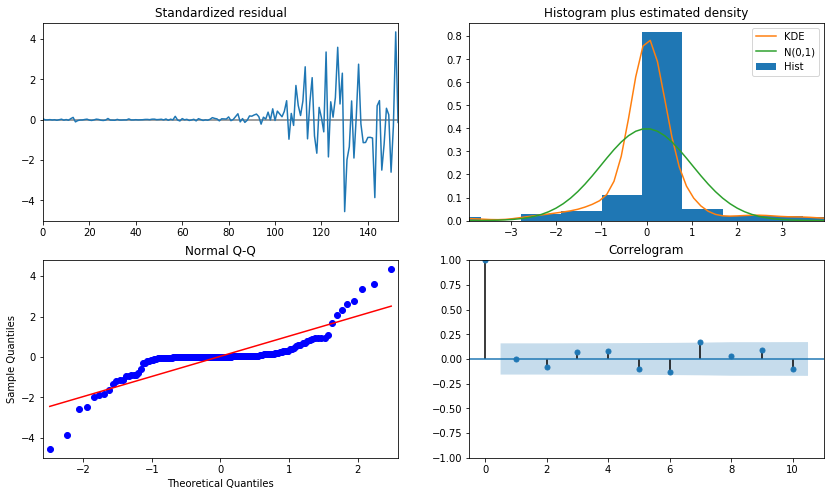

In [39]:
modelo_arima.plot_diagnostics(figsize=(14, 8))
plt.show()

In [50]:


#predicción con Auto Arima casos
prediccion_nuevoscasos = modelo_arima.predict(n_periods= 7)
#prediccion_nuevoscasos.columns = ['Predicción nuevos casos']
prediccion_nuevoscasos

array([923.65914599, 980.35129274, 878.29485235, 973.23347387,
       864.54258537, 998.90850594, 778.562509  ])

In [ ]:
prediccion_nuevoscasos

C:\Users\yaflo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Unrecognized location 'left corner'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  """


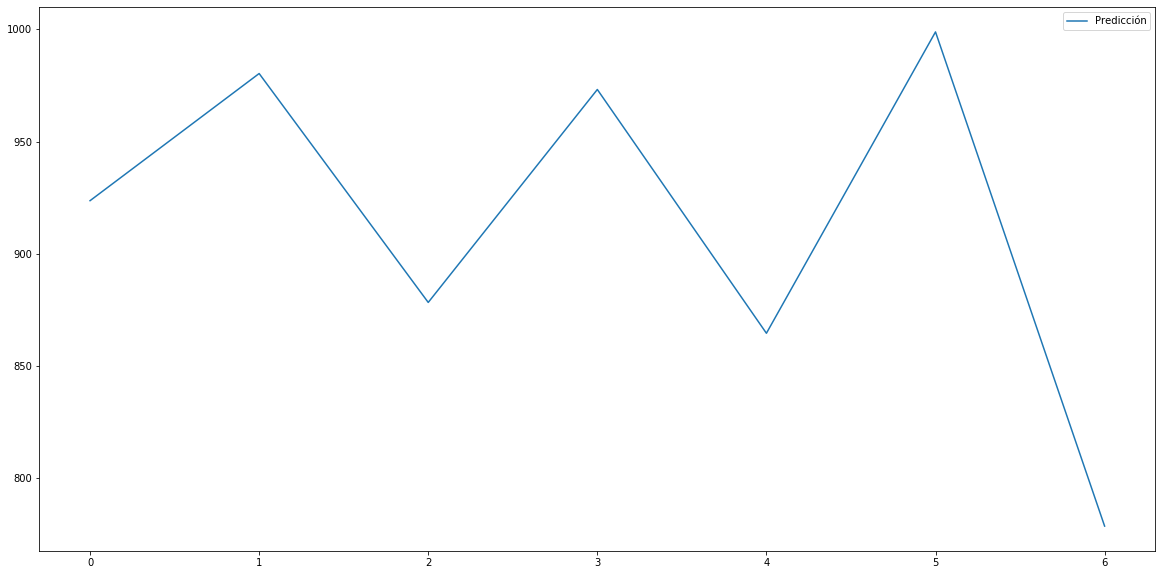

In [51]:
plt.figure(figsize=(20,10))


plt.plot(prediccion_nuevoscasos, label='Predicción')
plt.legend(loc='left corner')
plt.show()


In [12]:
from sklearn.metrics import r2_score
test['Predicción nuevos casos'] = prediccion_nuevoscasos
r2_score(test['CASOS'], test['Predicción nuevos casos'])

C:\Users\yaflo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


-31.71816268355265